# Pretrage grafova

1. Definisanje grafa
2. Slepe pretrage
3. Rekonstruisanje putanje

In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

# Zadatak 1

Definisati graf čiji čvorovi predstavljaju gradove a grane postojeće puteve između gradova. Iscrtati definisani graf.

Graph with 7 nodes and 9 edges


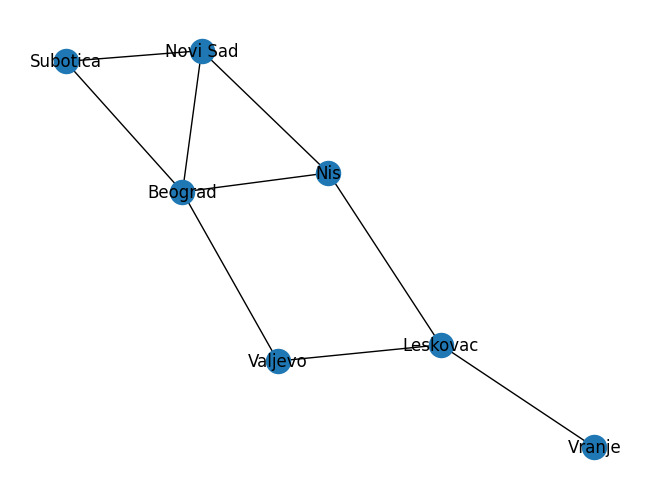

In [2]:
graf = {
    "Novi Sad": ["Beograd", "Subotica", "Nis"],
    "Beograd": ["Novi Sad", "Nis", "Subotica", "Valjevo"],
    "Valjevo": ["Beograd", "Leskovac"],
    "Leskovac": ["Valjevo", "Nis", "Vranje"],
    "Vranje": ["Leskovac"],
    "Subotica": ["Beograd", "Novi Sad"],
    "Nis": ["Beograd", "Novi Sad", "Leskovac"]
}

nx_graf = nx.from_dict_of_lists(graf)
print(nx_graf)
nx.draw(nx_graf, with_labels=True)

# Zadatak 2

Napisati funkciju bfs koja vrši pretragu prvi u širinu.

In [3]:
def bfs(graf, pocetni_cvor, ciljni_cvor):
    za_obradu = [pocetni_cvor]
    obradjeni = set([pocetni_cvor])
    while len(za_obradu) > 0:
        trenutni_cvor = za_obradu.pop(0)
        if trenutni_cvor == ciljni_cvor:
            return trenutni_cvor
        for sused in graf[trenutni_cvor]:
            if sused not in obradjeni:
                obradjeni.add(sused)
                za_obradu.append(sused)
    return None

rezultat = bfs(graf, "Subotica", "Vranje")
print(rezultat)

Vranje


# Zadatak 3

Prepraviti rešenje prethodnog zadatka tako da se kao rezultat dobija rekonstruisana putanja do pronađenog čvora ili None ukoliko je pretraga neuspešna.

In [4]:
def napravi_putanju(rezultat):
    putanja = []
    roditelj = rezultat
    while roditelj[1] is not None:
        putanja.insert(0, (roditelj[1][0], roditelj[0]))
        roditelj = roditelj[1]
    return putanja

In [5]:
def bfs(graf, pocetni_cvor, ciljni_cvor):
    za_obradu = [(pocetni_cvor, None)]
    obradjeni = set([pocetni_cvor])
    while len(za_obradu) > 0:
        trenutni_cvor = za_obradu.pop(0)
        if trenutni_cvor[0] == ciljni_cvor:
            return trenutni_cvor
        for sused in graf[trenutni_cvor[0]]:
            if sused not in obradjeni:
                obradjeni.add(sused)
                za_obradu.append((sused, trenutni_cvor))
    return None

('Vranje', ('Leskovac', ('Nis', ('Beograd', ('Subotica', None)))))
[('Subotica', 'Beograd'), ('Beograd', 'Nis'), ('Nis', 'Leskovac'), ('Leskovac', 'Vranje')]


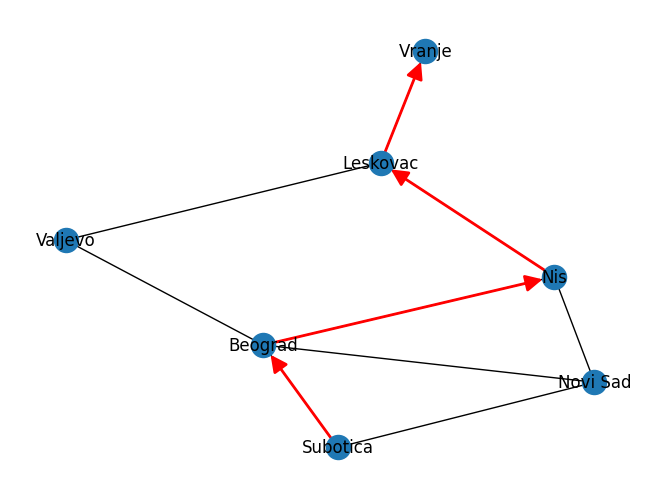

In [6]:
rezultat = bfs(graf, "Subotica", "Vranje")
print(rezultat)

putanja = napravi_putanju(rezultat)
print(putanja)

layout = nx.spring_layout(nx_graf)
nx.draw(nx_graf, with_labels=True, pos=layout)
nx.draw_networkx_edges(nx_graf, edgelist=putanja, pos=layout, edge_color="r", arrows=True, width=2, arrowsize=25, arrowstyle="-|>")

# Zadatak 4

Napisati funkciju dfs koja radi pretragu prvi u dubinu i vraća putanju do pronađenog cilja ili None u slučaju da cilj nije pronađen.

In [7]:
def dfs(graf, pocetni_cvor, ciljni_cvor):
    za_obradu = [(pocetni_cvor, None)]
    obradjeni = set([pocetni_cvor])
    while len(za_obradu) > 0:
        trenutni_cvor = za_obradu.pop(0)
        if trenutni_cvor[0] == ciljni_cvor:
            return trenutni_cvor
        for sused in graf[trenutni_cvor[0]]:
            if sused not in obradjeni:
                obradjeni.add(sused)
                za_obradu.insert(0, (sused, trenutni_cvor))
    return None

('Vranje', ('Leskovac', ('Nis', ('Novi Sad', ('Subotica', None)))))
[('Subotica', 'Novi Sad'), ('Novi Sad', 'Nis'), ('Nis', 'Leskovac'), ('Leskovac', 'Vranje')]


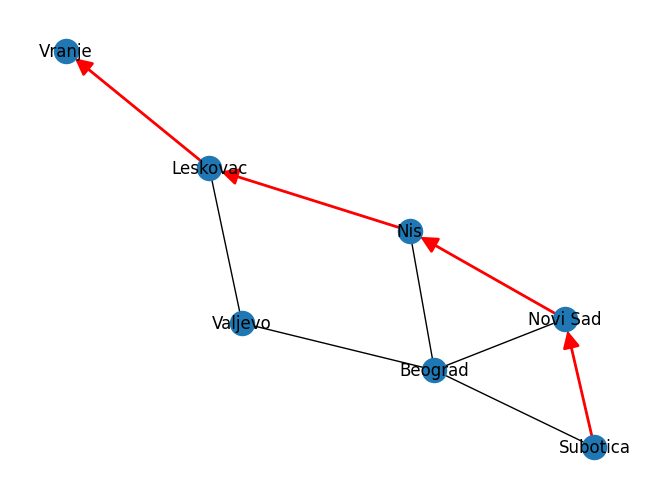

In [8]:
rezultat = dfs(graf, "Subotica", "Vranje")
print(rezultat)

putanja = napravi_putanju(rezultat)
print(putanja)

layout = nx.spring_layout(nx_graf)
nx.draw(nx_graf, with_labels=True, pos=layout)
nx.draw_networkx_edges(nx_graf, edgelist=putanja, pos=layout, edge_color="r", arrows=True, width=2, arrowsize=25, arrowstyle="-|>")